In [1]:
import torch
from diffusers import StableDiffusionPipeline

2026-01-06 19:05:56.837361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767726357.234720      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767726357.351568      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767726358.379285      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767726358.379333      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767726358.379336      24 computation_placer.cc:177] computation placer alr

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
# Configurar o ID do modelo
repo_id = "runwayml/stable-diffusion-v1-5"

# Carregar o modelo (usando float16 para economizar memória da GPU)
pipe = StableDiffusionPipeline.from_pretrained(
    repo_id, 
    torch_dtype=torch.float16,
)

pipe = pipe.to(device)

# Definição dos Prompts
prompt = "A majestic dragon perched on a mountain peak, sunset, hyper-realistic, 8k, concept art"
negative_prompt = "low quality, blurry, distorted, extra limbs, text, watermark, bad anatomy"

# Geração com Parâmetros 
generator = torch.Generator(device=device).manual_seed(1024)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [4]:
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt, # O que NÃO queremos na imagem
    num_inference_steps=50,          # Qualidade: mais passos = mais detalhe
    guidance_scale=7.5,              # O quão fiel ao prompt a IA deve ser
    height=512,                      # Altura (múltiplo de 8)
    width=512,                       # Largura (múltiplo de 8)
    generator=generator
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

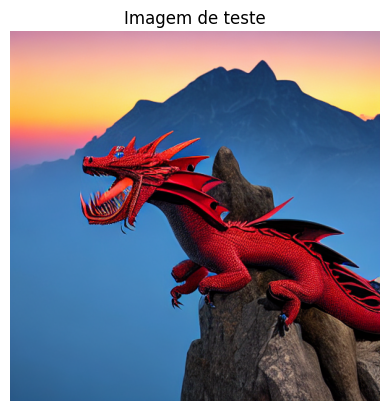

In [5]:
# Salvar
image.save("dragao.png")

caminho = "dragao.png"

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(caminho)
plt.imshow(img)
plt.axis('off') # Esconde os números dos eixos
plt.title("Imagem de teste")
plt.show()